# Covid-19 Analysis

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from matplotlib.ticker import EngFormatter

### 1. Getting the Data

In [2]:
df = pd.read_csv('https://opendata.ecdc.europa.eu/covid19/casedistribution/csv') # importing the dataset
df.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,10/07/2020,10,7,2020,255,20,Afghanistan,AF,AFG,38041757.0,Asia,9.812901
1,09/07/2020,9,7,2020,59,1,Afghanistan,AF,AFG,38041757.0,Asia,10.351783
2,08/07/2020,8,7,2020,210,16,Afghanistan,AF,AFG,38041757.0,Asia,10.811803
3,07/07/2020,7,7,2020,433,56,Afghanistan,AF,AFG,38041757.0,Asia,11.148276
4,06/07/2020,6,7,2020,279,38,Afghanistan,AF,AFG,38041757.0,Asia,10.824947


In [3]:
# clean the data
df = df.rename(columns={'dateRep':'Date' , 'countriesAndTerritories':'Country', 'countryterritoryCode':'Code' , 'popData2019' : 'Population'})
# change date time
df.Date = pd.to_datetime(df.Date, format='%d/%m/%Y')
df

,Date,day,month,year,cases,deaths,Country,geoId,Code,Population,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,2020-07-10,10,7,2020,255,20,Afghanistan,AF,AFG,38041757.0,Asia,9.812901
1,2020-07-09,9,7,2020,59,1,Afghanistan,AF,AFG,38041757.0,Asia,10.351783
2,2020-07-08,8,7,2020,210,16,Afghanistan,AF,AFG,38041757.0,Asia,10.811803
3,2020-07-07,7,7,2020,433,56,Afghanistan,AF,AFG,38041757.0,Asia,11.148276
4,2020-07-06,6,7,2020,279,38,Afghanistan,AF,AFG,38041757.0,Asia,10.824947
...,...,...,...,...,...,...,...,...,...,...,...,...
28872,2020-03-25,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
28873,2020-03-24,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
28874,2020-03-23,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
28875,2020-03-22,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN


In [4]:
df.shape

(28877, 12)

In [5]:
#import country latitude-longitude data as gdf
file_loc = './country_data/ne_110m_admin_0_countries.shp'
gdf = gpd.read_file(file_loc)[['ADMIN', 'ADM0_A3', 'geometry']]
gdf.columns = ['country', 'country_code', 'geometry']
gdf.head()

,country,country_code,geometry
0,Fiji,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,United Republic of Tanzania,TZA,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,Western Sahara,SAH,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Canada,CAN,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,United States of America,USA,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [6]:
# make country name in df same with gdf data
df = df.replace(to_replace='United_States_of_America', value='United States of America')
df

,Date,day,month,year,cases,deaths,Country,geoId,Code,Population,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,2020-07-10,10,7,2020,255,20,Afghanistan,AF,AFG,38041757.0,Asia,9.812901
1,2020-07-09,9,7,2020,59,1,Afghanistan,AF,AFG,38041757.0,Asia,10.351783
2,2020-07-08,8,7,2020,210,16,Afghanistan,AF,AFG,38041757.0,Asia,10.811803
3,2020-07-07,7,7,2020,433,56,Afghanistan,AF,AFG,38041757.0,Asia,11.148276
4,2020-07-06,6,7,2020,279,38,Afghanistan,AF,AFG,38041757.0,Asia,10.824947
...,...,...,...,...,...,...,...,...,...,...,...,...
28872,2020-03-25,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
28873,2020-03-24,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
28874,2020-03-23,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
28875,2020-03-22,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN


### 2. Create a new dataframe by countries, cases and deaths

In [7]:
cd_by_country = df.groupby('Country')[['cases','deaths']].sum().reset_index() # group countries by their number of cases and deaths
cd_by_country.sort_values(by='cases', ascending=False,inplace=True) # sort countries according to their cases, descending
top10_cd = cd_by_country.head(10) # assign top 10 countries according to their no of cases to a new dataframe
top10_cd

,Country,cases,deaths
197,United States of America,3118008,133291
27,Brazil,1755779,69184
92,India,793802,21604
159,Russia,707301,10843
152,Peru,316448,11314
41,Chile,306216,6682
199,United_Kingdom,287621,44602
126,Mexico,282283,33526
179,Spain,253056,28401
94,Iran,250458,12305


### 3. Graph of Case and Death Numbers by Countries

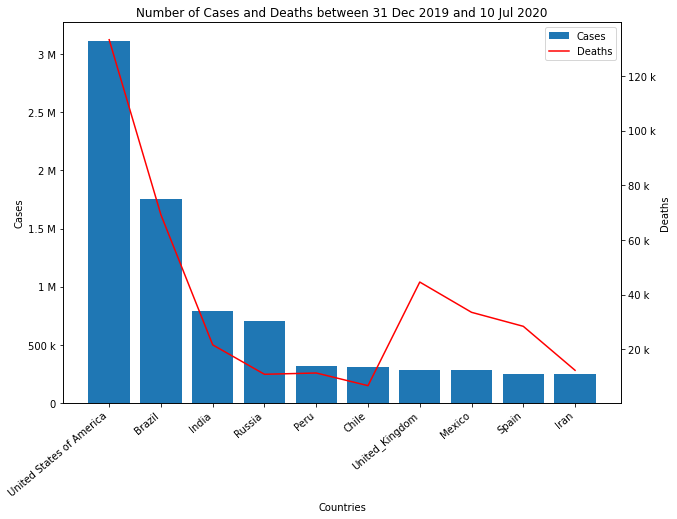

In [13]:
country_ar = top10_cd['Country'].values # create a numpy array of country names
cases_ar = top10_cd['cases'].values # create a numpy array of cases
deaths_arr = top10_cd['deaths'].values # create a numpy array of deaths
fig, ax = plt.subplots(figsize=(10,7)) # create figure and axes
ax.set_title('Number of Cases and Deaths between ' + df['Date'].min().strftime('%d %b %Y') + ' and ' + df['Date'].max().strftime('%d %b %Y')) # give a title name
bar = ax.bar(country_ar, cases_ar, label='Cases') # create bar chart using country and cases arrays
ax2 = ax.twinx() # create a twin of axes by x
ax2.set_ylabel('Deaths') # set y label for axes-2 as Deaths
ax.set_xlabel('Countries') # set x label for axes-1 as Contries
ax.set_ylabel('Cases') # set y label for axes-1 as Cases

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right') # rotate x labels 
ax.yaxis.set_major_formatter(EngFormatter())
ax2.yaxis.set_major_formatter(EngFormatter())

p1 = ax2.plot(country_ar, deaths_arr, label='Deaths',color='r') # create line chart using country and deaths arrays
graphs = [bar]+p1 # combine bar chart and line chart into one graph

labels = [g.get_label() for g in graphs] # 
ax.legend(graphs, labels) # create a legend including both charts' labels
plt.show()

### 4. Graph of Case and Death Increases by Date for Countries

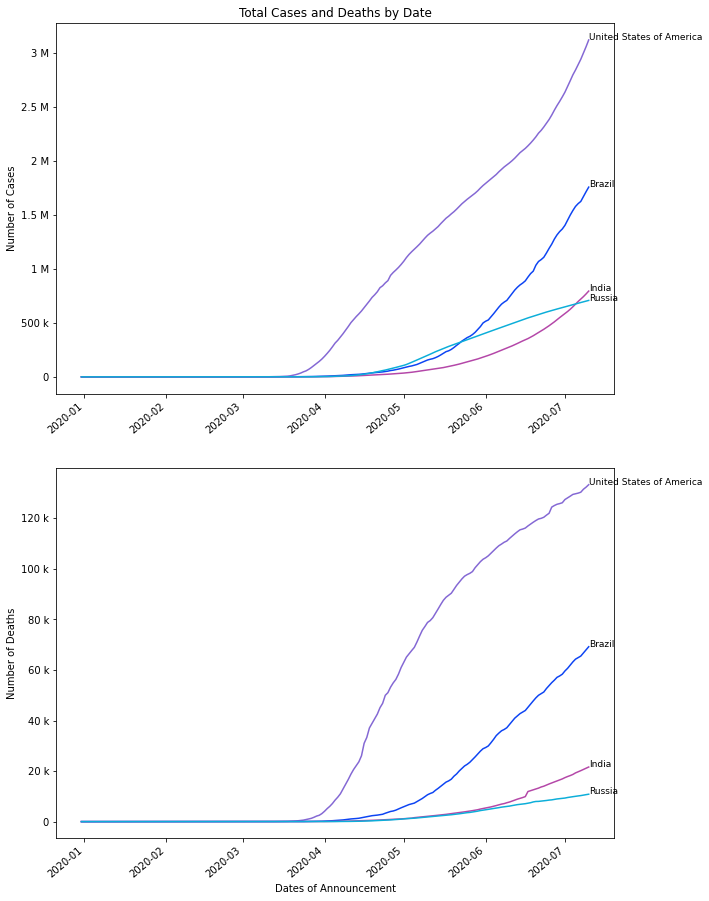

In [15]:
fig, (ax, ax2) = plt.subplots(2, figsize=(10,15)) # create figure and axes
#ax.set_xlabel('Dates of Announcement') # set x axis label
ax.set_ylabel('Number of Cases') # set y axis label
ax.set_title('Total Cases and Deaths by Date')
ax2.set_xlabel('Dates of Announcement') # set x axis label
ax2.set_ylabel('Number of Deaths') # set y axis label


# create a randomly select colors as a list of 10 elements, use it for line colors in the graph
import random
num_color = 10
my_color = ['#'+''.join([random.choice('0123456789ABCDEF') for j in range(6)]) 
        for i in range(num_color)]


# create a loop to produce 10 different countries' lines

idx = pd.date_range(start=df.Date.min(), end=df.Date.max()) # use pandas date_range to select a range starting from the earliest date in the main dataframe and ending at the latest date

for c in range(0, len(country_ar[:4])): # c counts as the length of country array which is 10
    ctry = df.loc[df['Country']== country_ar[c]] # select c'th element(country) from country_ar array, and select the data of this country from main database and assign it to ctry 
    ctry = ctry[['Date','Country','cases','deaths']] # take only necessary columns from main data
    ctry = ctry.sort_values(by=['Date'], ascending=[True]) # sort dates ascending
    ctry.set_index('Date', inplace=True) # make the date column index in order to fill missing dates
    ctry = ctry.reindex(idx, fill_value=0).rename_axis('Date').reset_index() # fill missig dates in given date range, than reset index
    for i in range(1, len(ctry)): # for each one of ten countries
        ctry.loc[i, 'cases'] += ctry.loc[i-1, 'cases'] # write the total cases up to the given date
        ctry.loc[i, 'deaths'] += ctry.loc[i-1, 'deaths'] 
    ax.plot(ctry.Date, ctry.cases, label=country_ar[c],color=my_color[c]) # make a line chart using dates and cases
    ax.text(ctry.Date.values[-1], ctry.cases.values[-1], country_ar[c], fontsize=9) # put a text(country name) to the last point of the line
    ax2.plot(ctry.Date, ctry.deaths, label=country_ar[c], color=my_color[c])
    ax2.text(ctry.Date.values[-1], ctry.deaths.values[-1], country_ar[c], fontsize=9)
    
fig.canvas.draw() # need to draw canvas before rotating x labels since we will get labels on to the canvas
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right') # rotate the x labels
ax2.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
ax.yaxis.set_major_formatter(EngFormatter())
ax2.yaxis.set_major_formatter(EngFormatter())
plt.show() 

### 5. Deaths by Country after 100 deaths

In [16]:
countries = pd.unique(df['Country']) # make country array
idx = pd.date_range(start=df.Date.min(), end=df.Date.max()) #select range
# for the first country, fill missing dates and sum cases and deaths cumulatively outside of the for loop
cum_df = df.loc[df['Country']== countries[0]] 
cum_df = cum_df.sort_values(by=['Date'], ascending=[True])
cum_df.set_index('Date', inplace=True) 
cum_df = cum_df.reindex(idx, fill_value=0).rename_axis('Date').reset_index() 
for j in range(1, len(cum_df)):
    cum_df.loc[j, 'cases'] += cum_df.loc[j-1, 'cases']   
    cum_df.loc[j, 'deaths'] += cum_df.loc[j-1, 'deaths']
cum_df=cum_df[cum_df.deaths > 99].reset_index() # take only 'after 100 deaths data'
cum_df['day'] = cum_df.index + 1 # make day column starting from 1 and increasing 1 in each row
                                # it will show the number of day after 100 deaths
# use for loop for other 9 countries
for i in range(1, len(countries)): 
    cum_df_tmp = df.loc[df['Country']== countries[i]] 
    cum_df_tmp = cum_df_tmp.sort_values(by=['Date'], ascending=[True])
    cum_df_tmp.set_index('Date', inplace=True) 
    cum_df_tmp = cum_df_tmp.reindex(idx, fill_value=0).rename_axis('Date').reset_index() 
    for j in range(1, len(cum_df_tmp)):
        cum_df_tmp.loc[j, 'cases'] += cum_df_tmp.loc[j-1, 'cases']   
        cum_df_tmp.loc[j, 'deaths'] += cum_df_tmp.loc[j-1, 'deaths']
    cum_df_tmp=cum_df_tmp[cum_df_tmp.deaths > 99].reset_index()
    cum_df_tmp['day'] = cum_df_tmp.index + 1
    cum_df = cum_df.append(cum_df_tmp) # use append to create dataframe

In [17]:
# clean the data
cum_df = cum_df.drop(columns=['month','year','geoId'])
cum_df.head()

,index,Date,day,cases,deaths,Country,Code,Population,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,128,2020-05-07,1,3392,104,Afghanistan,AFG,38041757.0,Asia,5.825178
1,129,2020-05-08,2,3563,106,Afghanistan,AFG,38041757.0,Asia,5.998671
2,130,2020-05-09,3,3778,109,Afghanistan,AFG,38041757.0,Asia,6.379832
3,131,2020-05-10,4,4033,115,Afghanistan,AFG,38041757.0,Asia,6.755734
4,132,2020-05-11,5,4402,120,Afghanistan,AFG,38041757.0,Asia,7.546970


<function matplotlib.pyplot.show>

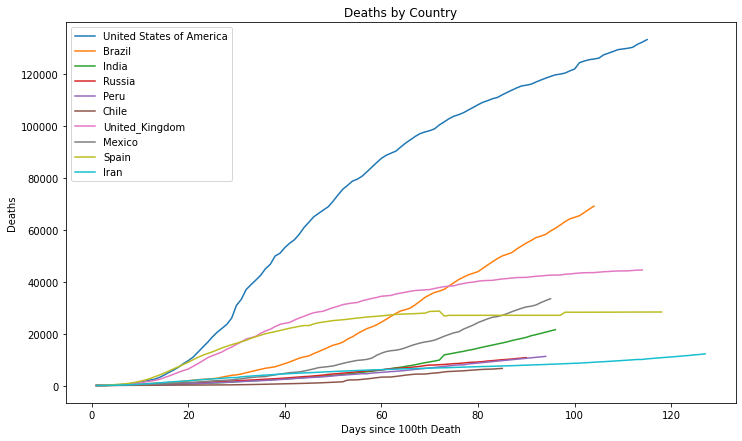

In [18]:
fig, ax = plt.subplots(figsize=(12,7)) # make a plot
# use for loop to draw each line seperatly for each country
for c in country_ar:
    temp=cum_df.loc[cum_df['Country']== c]
    ax.plot(temp.day, temp.deaths, label=c)
ax.set_xlabel('Days since 100th Death')
ax.set_ylabel('Deaths')
ax.set_title('Deaths by Country')
ax.legend()
plt.show

### 7. Cases per Million

In [19]:
# group by country by summing cases and taking the population as same
grouped = df.groupby('Country').agg({'cases':'sum', 'Population':'max', 'Code':'max'})
# make a new column which calculates number of cases per million
pop = grouped.Population /1000000
grouped['CasePerMillion'] = round(grouped.cases / pop)
grouped = grouped.sort_values(by='CasePerMillion', ascending=False)
grouped_c = grouped.drop(grouped[grouped.Population<500000].index) # drop rows of low populated countries
grouped_c = grouped_c.drop(grouped_c[grouped_c.Population.isnull()].index) # drop null rows
grouped_c.CasePerMillion = grouped_c['CasePerMillion'].astype(int) # convert column to integer
grouped_c.head(25)

,cases,Population,Code,CasePerMillion
Country,,,,
Qatar,102110,2832071.0,QAT,36055
Bahrain,31528,1641164.0,BHR,19211
Chile,306216,18952035.0,CHL,16157
Kuwait,52840,4207077.0,KWT,12560
Oman,51725,4974992.0,OMN,10397
Armenia,30346,2957728.0,ARM,10260
Panama,42216,4246440.0,PAN,9942
Peru,316448,32510462.0,PER,9734
United States of America,3118008,329064917.0,USA,9475


### 8. Corona Cases on World Map

In [20]:
# shapefile and geopandas are already imported
# drop the row for ‘Antarctica’ as it unnecessarily occupies a large space in our map and is not required in our current analysis.
print(gdf[gdf['country']=='Antarctica']) # find the index of Antarctica
gdf = gdf.drop(gdf.index[159]) # drop the entire row

        country country_code  \
159  Antarctica          ATA   

                                              geometry  
159  MULTIPOLYGON (((-48.66062 -78.04702, -48.15140...  


In [21]:
cd_by_country = df.groupby('Country').agg({'cases':'sum','deaths':'sum', 'Code':'max'}).reset_index()
cd_by_country

,Country,cases,deaths,Code
0,Afghanistan,33908,957,AFG
1,Albania,3188,83,ALB
2,Algeria,17808,988,DZA
3,Andorra,855,52,AND
4,Angola,396,22,AGO
...,...,...,...,...
205,Vietnam,369,0,VNM
206,Western_Sahara,519,1,ESH
207,Yemen,1356,361,YEM
208,Zambia,1895,42,ZMB


In [22]:
# merge my data: cd_by_country and gdf
# use left merge to preserve evry row in gdf ( so that we won't loose any country info in map)
merged = gdf.merge(cd_by_country, left_on = 'country_code', right_on = 'Code', how = 'left')
merged

,country,country_code,geometry,Country,cases,deaths,Code
0,Fiji,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji,21.0,0.0,FJI
1,United Republic of Tanzania,TZA,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",United_Republic_of_Tanzania,509.0,21.0,TZA
2,Western Sahara,SAH,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN,NaN,NaN
3,Canada,CAN,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,106793.0,8749.0,CAN
4,United States of America,USA,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United States of America,3118008.0,133291.0,USA
...,...,...,...,...,...,...,...
171,Republic of Serbia,SRB,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",Serbia,17342.0,352.0,SRB
172,Montenegro,MNE,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",Montenegro,1019.0,19.0,MNE
173,Kosovo,KOS,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",NaN,NaN,NaN,NaN
174,Trinidad and Tobago,TTO,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",Trinidad_and_Tobago,133.0,8.0,TTO


In [23]:
# In order to represent geographical features, convert the merged file to GeoJSON format
import json
#read data to json
merged_json = json.loads(merged.to_json())
# Convert to String like object.
json_data = json.dumps(merged_json)

In [24]:
# use Bokeh library to make choropleth map
from bokeh.io import output_notebook, show, output_file
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar, LogColorMapper
from bokeh.palettes import brewer

In [26]:
#Input GeoJSON source that contains features for plotting.
geosource = GeoJSONDataSource(geojson = json_data)
#Define a sequential multi-hue color palette.
palette = brewer['YlGnBu'][8]
#Reverse color order so that dark blue is highest number of cases.
palette = palette[::-1]
#Instantiate LinearColorMapper that linearly maps numbers in a range, into a sequence of colors.
color_mapper = LinearColorMapper(palette = palette, low = 0, high = 400000)
#Define custom tick labels for color bar.
tick_labels = {'0': '0', '50000':'50K', '100000': '100K','150000':'150K', '200000':'200K',
               '250000' : '250K', '300000':'300K', '350000' : '350K', '400000':'400K+'}
#Create color bar. 
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8,width = 500, height = 20,
border_line_color=None,location = (0,0), orientation = 'horizontal', major_label_overrides = tick_labels)
#Create figure object.
p = figure(title = 'Number of Cases by Country - Until ' + df['Date'].max().strftime('%d %b %Y'), plot_height = 600 , plot_width = 950, toolbar_location = None)
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None
#Add patch renderer to figure. 
p.patches('xs','ys', source = geosource,fill_color = {'field' :'cases', 'transform' : color_mapper},
          line_color = 'black', line_width = 0.25, fill_alpha = 1)
#Specify figure layout.
p.add_layout(color_bar, 'below')
#Display figure inline in Jupyter Notebook.
output_notebook()
#Display figure.
show(p)

Loading BokehJS ...

In [28]:
# use the table includes cases per million column ( grouped )
merged2 = gdf.merge(grouped, left_on = 'country_code', right_on = 'Code', how = 'left')
#read data to json
merged_json2 = json.loads(merged2.to_json())
# Convert to String like object.
json_data2 = json.dumps(merged_json2)

In [29]:
#Input GeoJSON source that contains features for plotting.
geosource = GeoJSONDataSource(geojson = json_data2)
#Define a sequential multi-hue color palette.
palette = brewer['YlGnBu'][8]
#Reverse color order so that dark blue is highest number of cases.
palette = palette[::-1]
#Instantiate LinearColorMapper that linearly maps numbers in a range, into a sequence of colors.
color_mapper = LinearColorMapper(palette = palette, low = 0, high = 8000)
#Define custom tick labels for color bar.
tick_labels = {'8000':'8000+'}
#Create color bar. 
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8,width = 500, height = 20,
border_line_color=None,location = (0,0), orientation = 'horizontal', major_label_overrides = tick_labels)
#Create figure object.
p = figure(title = 'Number of Cases per Million by Country - Until ' + df['Date'].max().strftime('%d %b %Y'), plot_height = 600 , plot_width = 950, toolbar_location = None)
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None
#Add patch renderer to figure. 
p.patches('xs','ys', source = geosource,fill_color = {'field' :'CasePerMillion', 'transform' : color_mapper},
          line_color = 'black', line_width = 0.25, fill_alpha = 1)
#Specify figure layout.
p.add_layout(color_bar, 'below')
#Display figure inline in Jupyter Notebook.
output_notebook()
#Display figure.
show(p)

Loading BokehJS ...